In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "planet_project_ML.csv",
    comment="#",     
    sep=",",         
    engine="python"
)

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39315 entries, 0 to 39314
Columns: 289 entries, rowid to pl_ndispec
dtypes: float64(255), int64(6), object(28)
memory usage: 86.7+ MB


In [6]:
df.columns


Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name',
       'tic_id', 'gaia_dr2_id', 'gaia_dr3_id', 'default_flag',
       ...
       'rowupdate', 'pl_pubdate', 'releasedate', 'pl_nnotes', 'st_nphot',
       'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec', 'pl_ndispec'],
      dtype='object', length=289)

In [8]:
df = df[['pl_rade', 'pl_bmasse', 'pl_orbper',
         'pl_orbsmax', 'pl_eqt', 'pl_dens',
         'st_teff', 'st_lum', 'st_met', 'st_spectype']]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39315 entries, 0 to 39314
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_rade      27103 non-null  float64
 1   pl_bmasse    7133 non-null   float64
 2   pl_orbper    35961 non-null  float64
 3   pl_orbsmax   21983 non-null  float64
 4   pl_eqt       17248 non-null  float64
 5   pl_dens      2747 non-null   float64
 6   st_teff      35777 non-null  float64
 7   st_lum       9684 non-null   float64
 8   st_met       24812 non-null  float64
 9   st_spectype  2911 non-null   object 
dtypes: float64(9), object(1)
memory usage: 3.0+ MB


In [10]:
df.isnull().sum()

pl_rade        12212
pl_bmasse      32182
pl_orbper       3354
pl_orbsmax     17332
pl_eqt         22067
pl_dens        36568
st_teff         3538
st_lum         29631
st_met         14503
st_spectype    36404
dtype: int64

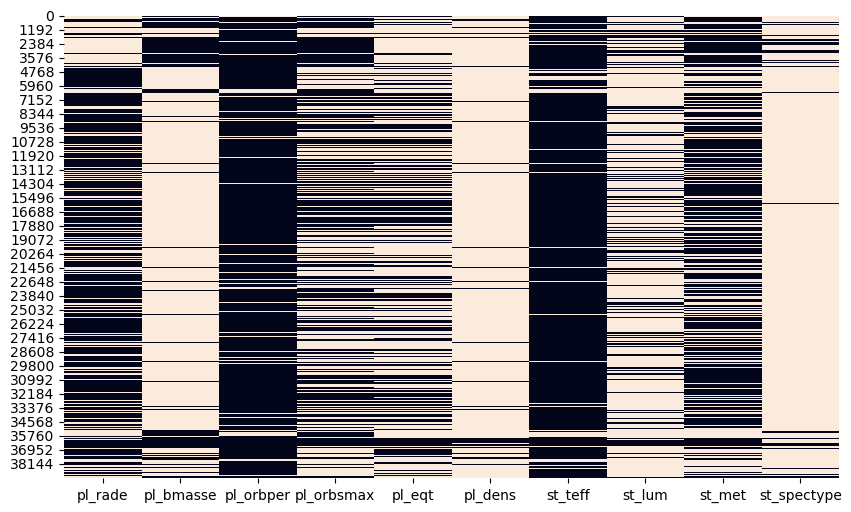

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [12]:
df = df.drop_duplicates()

In [15]:
df['pl_rade'] = df['pl_rade'].fillna(df['pl_rade'].median())
df['pl_bmasse'] = df['pl_bmasse'].fillna(df['pl_bmasse'].median())
df['pl_orbper'] = df['pl_orbper'].fillna(df['pl_orbper'].median())
df['pl_orbsmax'] = df['pl_orbsmax'].fillna(df['pl_orbsmax'].median())
df['pl_eqt'] = df['pl_eqt'].fillna(df['pl_eqt'].median())
df['pl_dens'] = df['pl_dens'].fillna(df['pl_dens'].median())
df['st_teff'] = df['st_teff'].fillna(df['st_teff'].median())
df['st_lum'] = df['st_lum'].fillna(df['st_lum'].median())
df['st_met'] = df['st_met'].fillna(df['st_met'].median())


In [16]:
df['st_spectype'] = df['st_spectype'].fillna(df['st_spectype'].mode()[0])


In [17]:
df.isnull().sum()


pl_rade        0
pl_bmasse      0
pl_orbper      0
pl_orbsmax     0
pl_eqt         0
pl_dens        0
st_teff        0
st_lum         0
st_met         0
st_spectype    0
dtype: int64

In [18]:
df = df[df['pl_rade'] > 0]
df = df[df['pl_bmasse'] > 0]
df = df[df['pl_orbper'] > 0]
df = df[df['pl_orbsmax'] > 0]
df = df[df['pl_eqt'] > 0]

In [19]:
Q1 = df['pl_rade'].quantile(0.25)
Q3 = df['pl_rade'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['pl_rade'] >= lower) & (df['pl_rade'] <= upper)]


In [20]:
df['habitability_score'] = (
    abs(df['pl_eqt'] - 288) +
    abs(df['pl_rade'] - 1) +
    abs(df['pl_orbsmax'] - 1) +
    abs(df['st_lum'])
)


In [21]:
df['stellar_compatibility'] = df['st_teff'] / df['st_teff'].max()


In [22]:
df['orbital_stability'] = df['pl_orbsmax'] / df['pl_orbper']


In [23]:
df = pd.get_dummies(df, columns=['st_spectype'])


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [25]:
df['target'] = (df['habitability_score'] < df['habitability_score'].median()).astype(int)


In [26]:
df.shape


(27602, 270)

In [27]:
df.isnull().sum()


pl_rade             0
pl_bmasse           0
pl_orbper           0
pl_orbsmax          0
pl_eqt              0
                   ..
st_spectype_M8.5    0
st_spectype_M9      0
st_spectype_WD      0
st_spectype_m3 V    0
target              0
Length: 270, dtype: int64

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27602 entries, 0 to 39314
Columns: 270 entries, pl_rade to target
dtypes: bool(257), float64(12), int64(1)
memory usage: 9.7 MB


In [29]:
df['target'].value_counts()


target
0    13801
1    13801
Name: count, dtype: int64

In [30]:
df.columns


Index(['pl_rade', 'pl_bmasse', 'pl_orbper', 'pl_orbsmax', 'pl_eqt', 'pl_dens',
       'st_teff', 'st_lum', 'st_met', 'habitability_score',
       ...
       'st_spectype_M7', 'st_spectype_M7.0 V', 'st_spectype_M7.25',
       'st_spectype_M7.5', 'st_spectype_M8', 'st_spectype_M8.5',
       'st_spectype_M9', 'st_spectype_WD', 'st_spectype_m3 V', 'target'],
      dtype='object', length=270)

In [31]:
df['target'].value_counts()


target
0    13801
1    13801
Name: count, dtype: int64

In [32]:
df.to_csv("preprocessed.csv", index=False)